In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import json
import requests
import matplotlib.pyplot as plt

# 1. 下载 ImageNet 类别文件
url = "https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json"
response = requests.get(url)
imagenet_classes = response.json()

# 2. 加载预训练的 VGG19 模型
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vgg19 = models.vgg19(pretrained=True).eval().to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:10<00:00, 56.5MB/s]


Top 5 Predictions (with ImageNet indices):
Index 546: electric guitar, Probability: 64.71%
Index 783: screw, Probability: 18.39%
Index 769: ruler, Probability: 3.60%
Index 600: hook, Probability: 2.70%
Index 677: nail, Probability: 2.45%


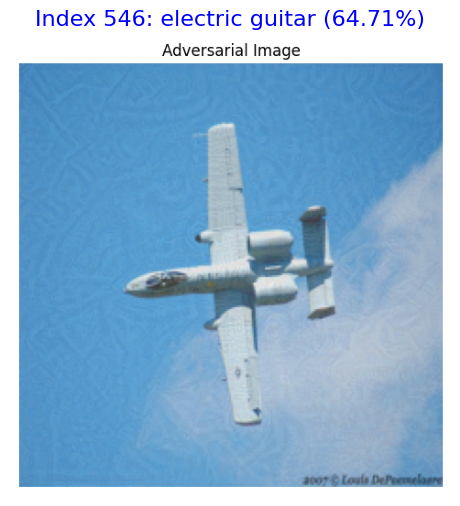

In [5]:


# 3. 定义预处理方法
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),  # 调整图片大小为 224x224
    transforms.ToTensor(),  # 转换为张量
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # 使用 ImageNet 的均值和标准差
])

# 4. 加载图片并预处理
image_path = "/content/sample_data/下载 (3).png"  # 替换为你的图片路径
image = Image.open(image_path).convert("RGB")  # 打开图片并转换为 RGB 模式
input_tensor = preprocess(image).unsqueeze(0).to(device)  # 添加 batch 维度并移动到设备

# 5. 使用 VGG19 模型进行预测
with torch.no_grad():  # 禁用梯度计算
    logits = vgg19(input_tensor)  # 模型输出 logits

# 6. 获取分类结果
probabilities = torch.nn.functional.softmax(logits[0], dim=0)  # 转换为概率
top5_prob, top5_catid = torch.topk(probabilities, 5)  # 获取前 5 个类别及其概率

print("Top 5 Predictions (with ImageNet indices):")
for i in range(top5_prob.size(0)):
    index = top5_catid[i].item()
    name = imagenet_classes[index]
    prob = top5_prob[i].item() * 100
    print(f"Index {index}: {name}, Probability: {prob:.2f}%")

#显示图片并标注最高概率的类别及序号
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.axis("off")

# 获取最高概率的标签及序号
top_label = f"Index {top5_catid[0].item()}: {imagenet_classes[top5_catid[0].item()]} ({top5_prob[0].item() * 100:.2f}%)"

# 在图片上标注标签
plt.title(top_label, fontsize=16, color='blue')
plt.show()

